In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load in data

In [11]:
# #load in adjacency matrix
adj = pd.read_excel('//Users/dominicburrows/Dropbox/PhD/Analysis/Project/Symmetry/adjacency.xlsx', index_col=0)

In [47]:
adj

,20150327_1013_BGUG_HuC_ltRFP_d5_F2,20150402_1013_BGUG_HuC_ltRFP_d5_F3,20160512_1013_BGUG_HuC_ltRFP_d6_F6_Neuron2,20160519_1013_BGUG_HuC_ltRFP_d6_F1,20160519_1013_BGUG_HuC_ltRFP_d6_F6,20160526_1013_BGUG_HuC_ltRFP_d6_F2_Neuron1,20160526_1013_BGUG_HuC_ltRFP_d6_F2_Neuron2,20160526_1013_BGUG_HuC_ltRFP_d6_F4,20160601_1013_BGUG_HuC_ltRFP_d6_F1,20160616_1013_BGUG_HuC_ltRFP_d7_F1,...,T_200120_17_4,T_200120_18_1,T_200120_19_1,T_200120_20_1,T_1600520_8_1,T_1600520_8_2,T_1600520_8_3,T_1600520_8_4,T_1600520_8_5,T_1600520_8_6
20150327_1013_BGUG_HuC_ltRFP_d5_F2,0,0,0,43,7,5,45,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20150402_1013_BGUG_HuC_ltRFP_d5_F3,0,0,232,0,20,0,0,60,0,178,...,0,0,0,0,0,0,0,50,0,0
20160512_1013_BGUG_HuC_ltRFP_d6_F6_Neuron2,0,232,0,0,0,0,0,37,0,240,...,0,0,0,0,0,0,0,0,0,0
20160519_1013_BGUG_HuC_ltRFP_d6_F1,43,0,0,0,6,3,2,0,0,0,...,0,0,0,0,0,0,0,0,2,0
20160519_1013_BGUG_HuC_ltRFP_d6_F6,7,20,0,6,0,0,5,55,0,6,...,0,0,0,0,0,0,0,0,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T_1600520_8_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T_1600520_8_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T_1600520_8_4,0,50,0,0,0,0,0,0,0,20,...,0,0,0,0,0,0,0,0,7,0
T_1600520_8_5,0,0,0,2,22,0,0,0,0,0,...,0,0,0,0,0,0,0,7,0,0


In [41]:
max(np.sum(adj,axis=1))

119118

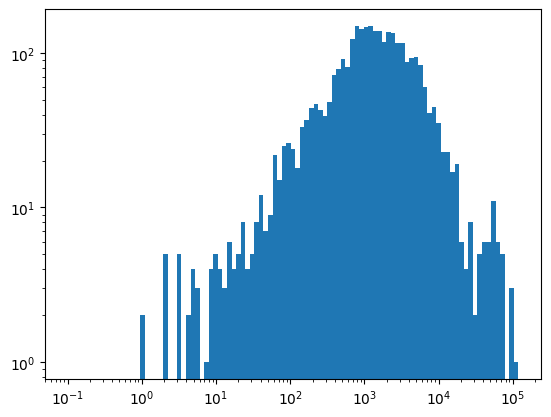

In [45]:
plt.hist(np.sum(adj,axis=1), bins = np.geomspace(0.1,np.max(np.sum(adj,axis=1)),100))
plt.xscale('log')
plt.yscale('log')
plt.show()

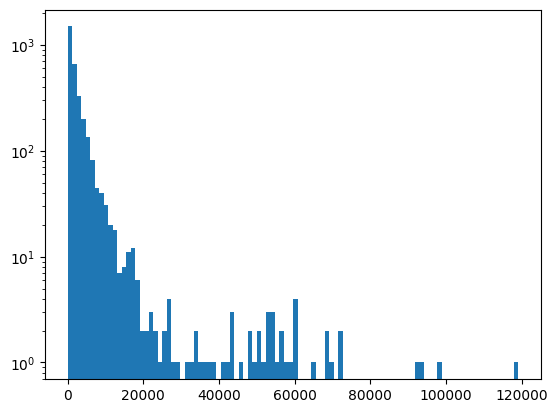

In [46]:
plt.hist(np.sum(adj,axis=1), bins = 100)
#plt.xscale('log')
plt.yscale('log')
plt.show()

### Get brain regions


In [ ]:
tif = pd.read_excel('//Users/dominicburrows/Dropbox/PhD/Analysis/Project/Symmetry/telencephalon.tif', index_col=0)

In [55]:
! pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.1 MB/s eta 0:00:00:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 9.3 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 13.0 MB/s eta 0:00:0000:0100:01


In [56]:
import rasterio
import numpy as np
from rasterio.features import shapes
from shapely.geometry import shape, mapping
import geopandas as gpd

# Load the masked TIFF
tif_path = '//Users/dominicburrows/Dropbox/PhD/Analysis/Project/Symmetry/telencephalon.tif'

with rasterio.open(tif_path) as src:
    # Read the image as an array
    image = src.read(1)  # Read the first band (assuming mask is in the first band)
    
    # Extract transform (to convert pixels to coordinates)
    transform = src.transform

    # Find mask: assuming nonzero values are masked areas
    mask = image > 0  # Change condition depending on your mask format

    # Convert mask to shapes (polygon extraction)
    shapes_gen = shapes(image, mask=mask, transform=transform)

    # Convert shapes to a list of polygons
    polygons = [shape(geom) for geom, value in shapes_gen]

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame({"geometry": polygons})

# Save to a file (optional)
gdf.to_file("masked_area.geojson", driver="GeoJSON")

# Display results
print(gdf)


/Users/dominicburrows/Applications/anaconda3/envs/py_38/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


Empty GeoDataFrame
Columns: [geometry]
Index: []


/Users/dominicburrows/Applications/anaconda3/envs/py_38/lib/python3.8/site-packages/geopandas/io/file.py:572: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


In [57]:
gdf

,geometry


In [51]:
with rasterio.open(tif_path) as src:
    # Read the image as an array
    image = src.read(1)  # Read the first band (assuming mask is in the first band)
    

NameError: name 'rasterio' is not defined

### Do coarse graining

In [ ]:
# COARSE GRAINING

# save separate file with soma location for each cell

# do pairwise pooling, based on xyz coordinates, keep track of n nuerons and spatial degree 

#with each pooling step, generate a new centroid location & a spatial extent thing (i.e. find max/min in xyz across all pooled neurons, and retain individual neuron ids)


In [ ]:
# symmetries in networks impact information processing and synchronisation

# regions and modules can show average connections based on regional pooling of functions

# do symmetries emerge at certain scales, i.e. when we start to pool neurons together

# here we assume neurons in the same brain region, have a similar function

In [48]:
adj

,20150327_1013_BGUG_HuC_ltRFP_d5_F2,20150402_1013_BGUG_HuC_ltRFP_d5_F3,20160512_1013_BGUG_HuC_ltRFP_d6_F6_Neuron2,20160519_1013_BGUG_HuC_ltRFP_d6_F1,20160519_1013_BGUG_HuC_ltRFP_d6_F6,20160526_1013_BGUG_HuC_ltRFP_d6_F2_Neuron1,20160526_1013_BGUG_HuC_ltRFP_d6_F2_Neuron2,20160526_1013_BGUG_HuC_ltRFP_d6_F4,20160601_1013_BGUG_HuC_ltRFP_d6_F1,20160616_1013_BGUG_HuC_ltRFP_d7_F1,...,T_200120_17_4,T_200120_18_1,T_200120_19_1,T_200120_20_1,T_1600520_8_1,T_1600520_8_2,T_1600520_8_3,T_1600520_8_4,T_1600520_8_5,T_1600520_8_6
20150327_1013_BGUG_HuC_ltRFP_d5_F2,0,0,0,43,7,5,45,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20150402_1013_BGUG_HuC_ltRFP_d5_F3,0,0,232,0,20,0,0,60,0,178,...,0,0,0,0,0,0,0,50,0,0
20160512_1013_BGUG_HuC_ltRFP_d6_F6_Neuron2,0,232,0,0,0,0,0,37,0,240,...,0,0,0,0,0,0,0,0,0,0
20160519_1013_BGUG_HuC_ltRFP_d6_F1,43,0,0,0,6,3,2,0,0,0,...,0,0,0,0,0,0,0,0,2,0
20160519_1013_BGUG_HuC_ltRFP_d6_F6,7,20,0,6,0,0,5,55,0,6,...,0,0,0,0,0,0,0,0,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T_1600520_8_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T_1600520_8_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T_1600520_8_4,0,50,0,0,0,0,0,0,0,20,...,0,0,0,0,0,0,0,0,7,0
T_1600520_8_5,0,0,0,2,22,0,0,0,0,0,...,0,0,0,0,0,0,0,7,0,0


In [ ]:
#get the genomic and regional coordinates



In [ ]:
#generate our most granular adjacency matrix file

In [ ]:
#

In [ ]:
#each time we do a coarse graining procedure we need to save our cells coords; or we need to map each label to a region



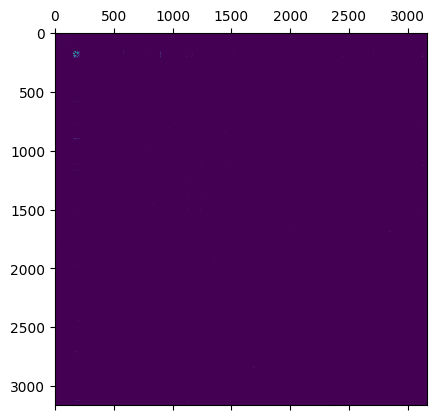

In [16]:
plt.matshow(adj)
plt.show()